<a href="https://colab.research.google.com/github/AnyaAP/ComputerGraphics/blob/main/z_buffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

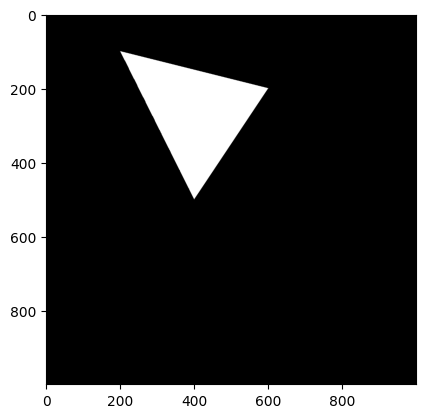

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import pygame
from pygame.locals import *
pygame.init()
image = Image.new('RGB',(1000, 1000))

width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Z-Buffer')

far_z = 1000

z_buffer = [[far_z for _ in range(width)] for __ in range(height)]


def draw_triangle(vertices):
    v0, v1, v2 = vertices
    y_min = min(v0[1], v1[1], v2[1])
    y_max = max(v0[1], v1[1], v2[1])

    for y in range(y_min, y_max + 1):
        x0, x1, x2 = interpolate(v0, v1, v2, y)
        x_min = min(x0, x1, x2)
        x_max = max(x0, x1, x2)

        for x in range(x_min, x_max + 1):
            if is_inside_triangle(x, y, v0, v1, v2):
                z = calculate_depth(v0, v1, v2, x, y)
                if z < z_buffer[y][x]:
                    z_buffer[y][x] = z
                    image.putpixel((x, y), (255, 255, 255))
def interpolate(v0, v1, v2, y):
    x0 = v0[0] + (v2[0] - v0[0]) * (y - v0[1]) / (v2[1] - v0[1])
    x1 = v0[0] + (v1[0] - v0[0]) * (y - v0[1]) / (v1[1] - v0[1])
    x2 = v1[0] + (v2[0] - v1[0]) * (y - v1[1]) / (v2[1] - v1[1])
    return int(x0), int(x1), int(x2)


def is_inside_triangle(x, y, v0, v1, v2):
    b0 = ((v1[1] - v2[1]) * (x - v2[0]) + (v2[0] - v1[0]) * (y - v2[1])) / \
         ((v1[1] - v2[1]) * (v0[0] - v2[0]) + (v2[0] - v1[0]) * (v0[1] - v2[1]))
    b1 = ((v2[1] - v0[1]) * (x - v2[0]) + (v0[0] - v2[0]) * (y - v2[1])) / \
         ((v1[1] - v2[1]) * (v0[0] - v2[0]) + (v2[0] - v1[0]) * (v0[1] - v2[1]))
    b2 = 1 - b0 - b1
    return 0 <= b0 <= 1 and 0 <= b1 <= 1 and 0 <= b2 <= 1

def calculate_depth(v0, v1, v2, x, y):

    b0 = ((v1[1] - v2[1]) * (x - v2[0]) + (v2[0] - v1[0]) * (y - v2[1])) / \
         ((v1[1] - v2[1]) * (v0[0] - v2[0]) + (v2[0] - v1[0]) * (v0[1] - v2[1]))
    b1 = ((v2[1] - v0[1]) * (x - v2[0]) + (v0[0] - v2[0]) * (y - v2[1])) / \
         ((v1[1] - v2[1]) * (v0[0] - v2[0]) + (v2[0] - v1[0]) * (v0[1] - v2[1]))
    b2 = 1 - b0 - b1
    depth = b0 * v0[2] + b1 * v1[2] + b2 * v2[2]
    return depth

vertices = [(200, 100, 20),(400, 500, 40),(600, 200, 30)]

draw_triangle(vertices)
plt.imshow(image)